# Datetime Handling on capital-onebike DataSet

### Import necessary module

In [5]:
import pandas as pd
import datetime as dt

### Import DataSet and loading datetime with parse_dates

In [6]:
rides = pd.read_csv("capital-onebike.csv", parse_dates = ["Start date", "End date"])

In [8]:
rides

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-01-10 15:23:00,2017-01-10 15:26:00,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-01-10 15:42:00,2017-01-10 17:49:00,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-02-10 06:37:00,2017-02-10 06:42:00,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-02-10 08:56:00,2017-02-10 09:18:00,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-02-10 18:23:00,2017-02-10 18:45:00,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member
...,...,...,...,...,...,...,...,...
285,2017-12-29 14:32:00,2017-12-29 14:43:00,31242,18th St & Pennsylvania Ave NW,31265,5th St & Massachusetts Ave NW,W20529,Member
286,2017-12-29 15:08:00,2017-12-29 15:18:00,31265,5th St & Massachusetts Ave NW,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,W20529,Casual
287,2017-12-29 20:33:00,2017-12-29 20:38:00,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31618,4th & East Capitol St NE,W20529,Member
288,2017-12-30 13:51:00,2017-12-30 13:54:00,31618,4th & East Capitol St NE,31610,Eastern Market / 7th & North Carolina Ave SE,W20529,Member


In [9]:
rides["Start date"].iloc[2]

Timestamp('2017-02-10 06:37:00')

In [10]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start date            290 non-null    datetime64[ns]
 1   End date              290 non-null    datetime64[ns]
 2   Start station number  290 non-null    int64         
 3   Start station         290 non-null    object        
 4   End station number    290 non-null    int64         
 5   End station           290 non-null    object        
 6   Bike number           290 non-null    object        
 7   Member type           290 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 18.2+ KB


### Create a duration column

In [11]:
rides["Duration"] = rides["End date"] - rides["Start date"]

In [17]:
rides[["Duration"]]

,Duration
0,0 days 00:03:00
1,0 days 02:07:00
2,0 days 00:05:00
3,0 days 00:22:00
4,0 days 00:22:00
...,...
285,0 days 00:11:00
286,0 days 00:10:00
287,0 days 00:05:00
288,0 days 00:03:00


In [18]:
rides["Duration"].dt.total_seconds()

0       180.0
1      7620.0
2       300.0
3      1320.0
4      1320.0
        ...  
285     660.0
286     600.0
287     300.0
288     180.0
289     600.0
Name: Duration, Length: 290, dtype: float64

## Summarizing datetime data in Pandas

In [19]:
#Average time out of the dock
rides["Duration"].mean()

Timedelta('0 days 02:48:36.413793103')

In [20]:
#Total time out of the dock
rides["Duration"].sum()

Timedelta('33 days 22:56:00')

In [21]:
#Percent of the time out of the deck
rides["Duration"].sum() / dt.timedelta(days = 91)

0.37313797313797314

In [24]:
#Count how many time the bike started in each station
rides["Member type"].value_counts()

Member    236
Casual     54
Name: Member type, dtype: int64

In [25]:
#Percent of rides by member
rides["Member type"].value_counts() / len(rides)

Member    0.813793
Casual    0.186207
Name: Member type, dtype: float64

In [27]:
#Add duration (in seconds) column
rides["Duration in seconds"] = rides["Duration"].dt.total_seconds()

In [28]:
#Average duration per member type
rides.groupby("Member type")["Duration in seconds"].mean()

Member type
Casual     1990.000000
Member    11975.847458
Name: Duration in seconds, dtype: float64

In [30]:
#Average duration by month
rides.resample("M", on = "Start date")["Duration in seconds"].mean()

Start date
2017-01-31      1968.000000
2017-02-28       670.000000
2017-03-31      1123.333333
2017-04-30      1065.000000
2017-05-31       402.000000
2017-06-30       907.826087
2017-07-31       580.000000
2017-08-31    163053.750000
2017-09-30       680.000000
2017-10-31      2663.529412
2017-11-30       917.586207
2017-12-31       675.600000
Freq: M, Name: Duration in seconds, dtype: float64

In [31]:
#Size per group
rides.groupby("Member type").size()

Member type
Casual     54
Member    236
dtype: int64

In [32]:
#First ride per group
rides.groupby("Member type").first()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Duration,Duration in seconds
Member type,,,,,,,,,
Casual,2017-01-10 15:42:00,2017-01-10 17:49:00,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,0 days 02:07:00,7620.0
Member,2017-01-10 15:23:00,2017-01-10 15:26:00,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,0 days 00:03:00,180.0


<AxesSubplot:xlabel='Start date'>

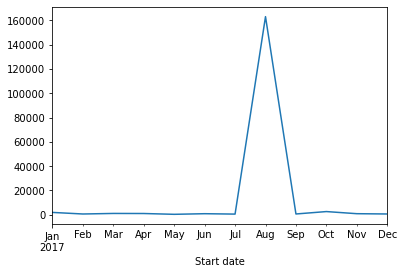

In [35]:
rides.resample("M", on = "Start date")["Duration in seconds"].mean().plot()

<AxesSubplot:xlabel='Start date'>

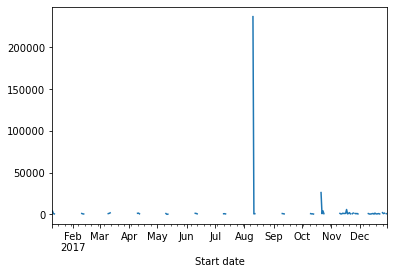

In [36]:
rides.resample("D", on = "Start date")["Duration in seconds"].mean().plot()

## Additional datetime methods in Pandas

In [38]:
#Year of first three rows
rides["Start date"].head().dt.year

0    2017
1    2017
2    2017
3    2017
4    2017
Name: Start date, dtype: int64

In [39]:
#See weekdays for first three rides
rides["Start date"].head().dt.day_name()

0    Tuesday
1    Tuesday
2     Friday
3     Friday
4     Friday
Name: Start date, dtype: object

In [41]:
#Shift the indexes foreward one, padding with NaT
rides["End date"].shift(1).head()

0                   NaT
1   2017-01-10 15:26:00
2   2017-01-10 17:49:00
3   2017-02-10 06:42:00
4   2017-02-10 09:18:00
Name: End date, dtype: datetime64[ns]